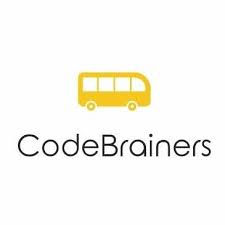

# Python Object-Oriented Programming (OOP)

_Mikołaj Leszczuk_

## Modelowanie

![](https://pics.awwmemes.com/its-only-a-model-memegenerator-net-its-only-a-model-52664171.png)

### Zadanie - zaimplementuj zwięrzątko Tamagotchi

[Tamagotchi](https://pl.wikipedia.org/wiki/Tamagotchi) to mała, elektroniczna zabawka pozwalająca "opiekować się" zwierzakiem. Tamagotchi wymaga karmienia, zabawy, czy sprzątania po nim.

Zasady Tamagotchi:

1. humor określa się na podstawie licznika głodu i znudzenia; dopóki głód jest poniżej określonego poziomu, i dopóki znudzenie jest poniżej określonego poziomu, dopóty Tamagotchi jest szczęśliwy
1. karmienie zmniejsza poziom głodu o określoną liczbę punktów
1. nauka nowych słówek lub przywitanie się z Tamagotchi zmniejsza poziom znudzenia o określoną liczbę punktów
1. znane słówka są listą wyrażeń, które Tamagotchi może wypowiedzieć (np. "Mmmmrrp" albo "Hrrp")
1. można wywołać metodę, która odpowiada "tyknięciu" zegara - w jej wyniku nuda i głód rosną o jedną jednostkę

Implementacja Tamagotchi:

1. pola klasy: `imie`, `prog_nudy`, `prog_glodu`, `malenie_nudy`, `malenie_glodu`, `poziom_nudy`, `poziom_glodu`, `slowa` (lista)
1. metoda `humor()` musi zwracać, na podstawie `prog_nudy`, `prog_glodu`, `poziom_nudy` i `poziom_glodu`, czy Tamagotchi jest szczęśliwy, głodny lub znudzony
1. metoda `__str__()` musi zwracać imię Tamagotchi i jego humor (np. "Jestem Tobi. Czuję się szczęśliwy.")
1. metoda `zegar()` musi zwiększać poziom znudzenia i głodu o jedną jednostkę
1. metody `zmniejsz_glod()` i `zmniejsz_nude()` mają zmniejszać odpowiednio `poziom_glodu` i `poziom_nudy` o `malenie_glodu` i malenie_nudy; **uwaga**: oba poziomy nie mogą spaść poniżej zera
1. metoda `przywitaj_sie()` musi wylosować element z listy `slowa`, zmniejszyć nudę i wypisać na ekranie "{Imię} mówi {słowo}."
1. metoda `naucz_slowo(slowo)` dodaje słowo do listy `slowa` i zmniejsza nudę
1. metoda `karm()` zmniejsza głód
1. metody `karm()`, `naucz_slowo()`, `przywitaj_sie()` oraz `__str__()` wywołują `zegar()`.

Do losowania elementu z listy `slowa` użyj funkcji `random.choice`.

Za wartości początkowe możesz przyjąć:

| Pole            | Wartość               |
|-----------------|-----------------------|
| `prog_nudy`     | 5                     |
| `prog_glodu`    | 10                    |
| `malenie_nudy`  | 4                     |
| `malenie_glodu` | 6                     |
| `słowa`         | `["Mmmmrrp", "Hrrp"]` |

### Rozwiązanie - zaimplementuj zwięrzątko Tamagotchi

In [1]:
import random


class Tamagotchi:
    prog_nudy = 5
    prog_glodu = 10
    malenie_nudy = 4
    malenie_glodu = 6

    def __init__(self, imie):
        self.imie = imie
        self.slowa = ["Mmmmrrp", "Hrrp"]
        self.poziom_glodu = 0
        self.poziom_nudy = 0

    def humor(self):
        if self.poziom_glodu > self.prog_glodu:
            return "głodny"
        elif self.poziom_nudy > self.prog_nudy:
            return "znudzony"
        else:
            return "szczęśliwy"

    def __str__(self):
        # kolejność jest ważna!
        # ponieważ self.zegar() może zmienić stan (głodny/znudzony) zwierzaka,
        # dlatego fajnie jeśli ten stan wyświetlimy
        self.zegar()
        return "Jestem {}. Czuję się {}.".format(self.imie, self.humor())

    def zegar(self):
        self.poziom_glodu += 1
        self.poziom_nudy += 1

    def zmniejsz_glod(self):
        self.poziom_glodu -= self.malenie_glodu
        if self.poziom_glodu < 0:
            self.poziom_glodu = 0

    def zmniejsz_nude(self):
        self.poziom_nudy -= self.malenie_nudy
        if self.poziom_nudy < 0:
            self.poziom_nudy = 0

    def przywitaj_sie(self):
        slowo = random.choice(self.slowa)
        print("{} mówi {}.".format(self.imie, slowo))
        self.zmniejsz_nude()
        self.zegar()

    def naucz_slowo(self, slowo):
        self.slowa.append(slowo)
        self.zmniejsz_nude()
        self.zegar()

    def karm(self):
        self.zmniejsz_glod()
        self.zegar()